In [6]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [7]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [8]:
from test_main import setup 

binary = os.path.abspath("./simple_loop/simple_loop")
outputfile = "./simple_loop/simple_loop.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: endbr64 
no latency information found for instruction: jle 
no latency information found for instruction: retq 


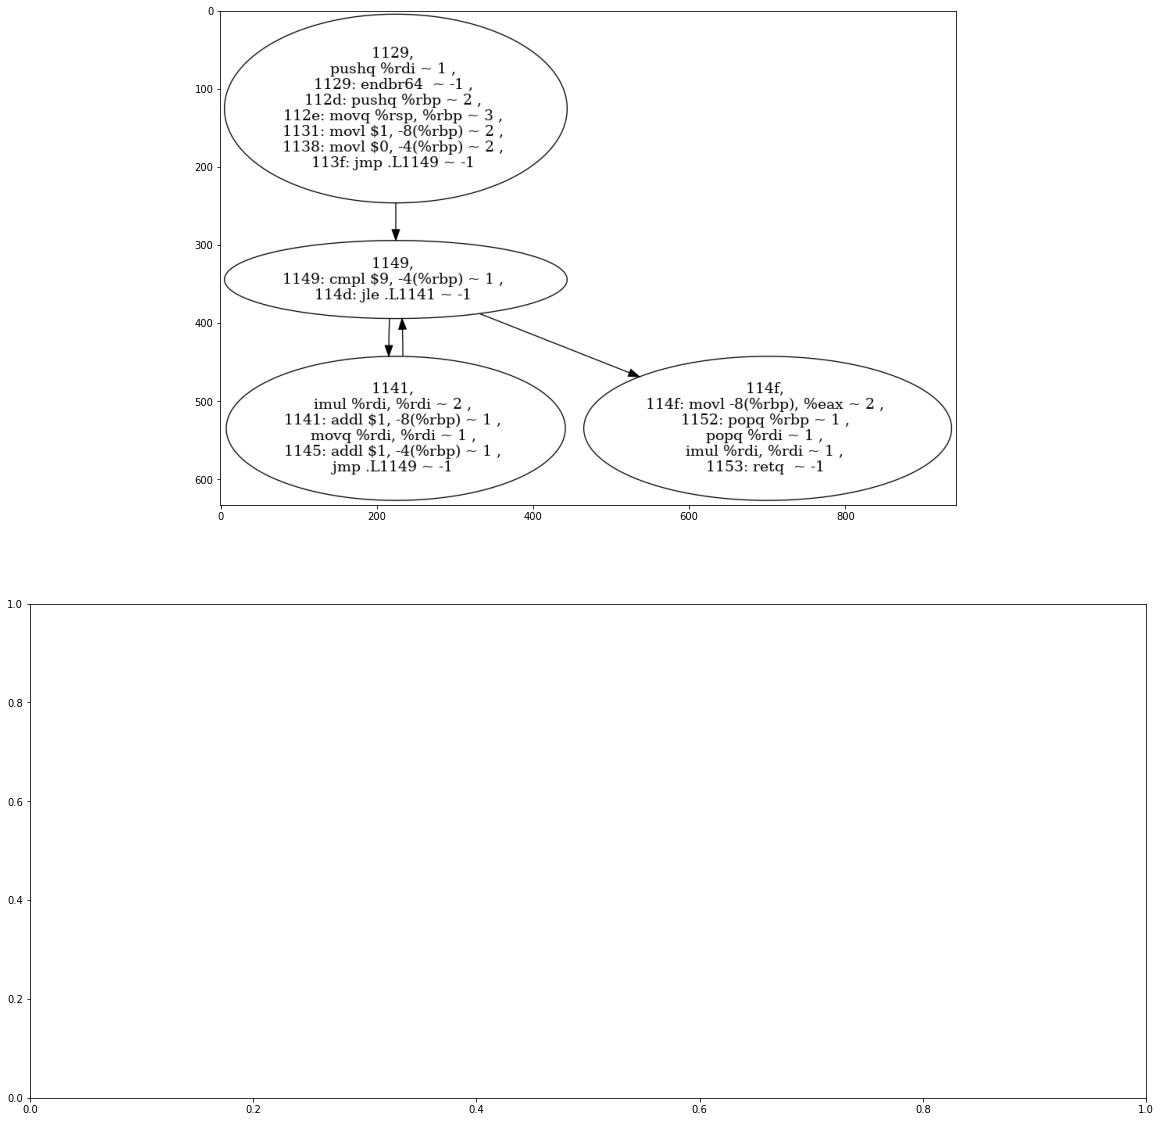

In [28]:
from rwtools.nemesis.nemesistool import NemesisInstrument 
figs, axs = plt.subplots(2, figsize=(20,20))


binary = os.path.abspath("./simple_loop/simple_loop")
outputfile = "./simple_loop.s"

nemesis = NemesisInstrument(binary, outputfile)

nemesis.cfg.unwind_graph()
nemesis.cfg.insert_nodes()

axs[0].imshow(nemesis.render_cfg())



nodes = [nemesis.cfg.get_node(x) for x in ['1141', '114f']]

nemesis.cfg.restore_cycles()
nemesis._align_nodes(nodes)

axs[0].imshow(nemesis.render_cfg())

# target_node = nemesis.cfg.get_node('1149')


# nemesis.instrument(target_node)

# axs[1].imshow(nemesis.render_cfg())

nemesis.dump()
